<a href="https://www.kaggle.com/code/jimschacko/tesla-stock-price-prediction?scriptVersionId=134528768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv
/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_data = pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')

In [4]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


In [5]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
1253,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200
1254,2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
1255,2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
1256,2023-06-21,275.130005,276.989990,257.779999,259.459991,259.459991,210937500


In [6]:
training_data.shape

(1257, 7)

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
training_set = training_data.iloc[:, 1:2].values

In [9]:
training_set.shape, training_data.shape

((1257, 1), (1257, 7))

In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.02844958],
       [0.02487418],
       [0.02586401],
       ...,
       [0.61804892],
       [0.62450863],
       [0.65863512]])

In [12]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1257):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train

array([[0.02844958, 0.02487418, 0.02586401, ..., 0.01784692, 0.01797044,
        0.0181841 ],
       [0.02487418, 0.02586401, 0.02735793, ..., 0.01797044, 0.0181841 ,
        0.0192941 ],
       [0.02586401, 0.02735793, 0.02796885, ..., 0.0181841 , 0.0192941 ,
        0.01659336],
       ...,
       [0.46877374, 0.45865846, 0.44961983, ..., 0.60450345, 0.62117864,
        0.59170915],
       [0.45865846, 0.44961983, 0.4565553 , ..., 0.62117864, 0.59170915,
        0.61804892],
       [0.44961983, 0.4565553 , 0.45049616, ..., 0.59170915, 0.61804892,
        0.62450863]])

In [14]:
y_train

array([0.0192941 , 0.01659336, 0.02044083, ..., 0.61804892, 0.62450863,
       0.65863512])

In [15]:
x_train.shape

(1197, 60)

In [16]:
# reshaping dataset
x_train = x_train.reshape(1197, 60, 1)

In [17]:
x_train.shape

(1197, 60, 1)

**#Building LSTM**

In [18]:
!pip install -U tensorflow==2.12.0
import tensorflow as tf
tf.__version__

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [19]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [20]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [21]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 12s 160ms/step - loss: 0.0627
Epoch 2/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0083
Epoch 3/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0063
Epoch 5/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0044
Epoch 13/100

In [25]:
# getting the real stock prices of Last One Year
test_data = pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv')

In [26]:
test_data.shape

(251, 7)

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [28]:
real_stock_price = test_data.iloc[:, 1:2].values

In [29]:
real_stock_price.shape

(251, 1)

In [30]:
# Getting predicted stock prices of Last One Year from 22-06-2022 to 22-06-2023

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(60, 310):
  x_test.append(inputs[i-60:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 43ms/step


In [31]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[240.1212]
[230.5]


(None, None)

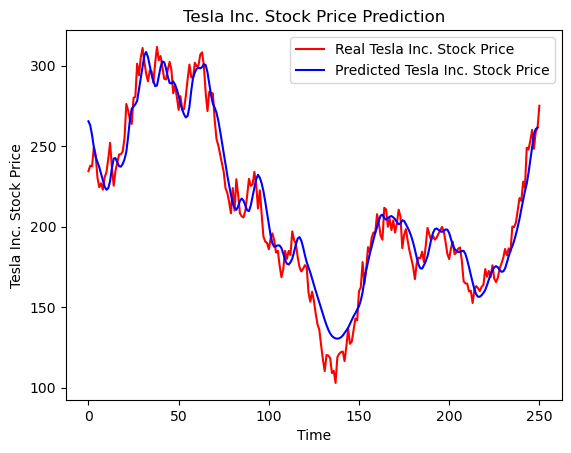

In [32]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Tesla Inc. Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()